In [250]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import DataFrame, concat
import pandas as pd
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [251]:
file_path = r'D:\project-rice-yield-prediction\datasets and notes\BD-rice(ok).xlsx'
df= pd.read_excel(file_path,sheet_name='Aman',skiprows=1)

In [32]:
df

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [252]:
# Filter out the yield data
data = df[df['yield'].notnull()]

In [24]:
data

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [270]:
# Set 'district' and 'year' as the index and keep the necessary columns
yield_data = data.set_index(['district', 'year'])[['yield','precip_1', 'precip_2', 'precip_5', 'precip_6', 
                                               'temp_1', 'temp_2', 'temp_5', 'temp_6',]]

# Display the reshaped DataFrame
yield_data.head()


yield   precip_1   precip_2  precip_5  precip_6  temp_1  \
district year                                                               
Bagerhat 2006  0.728570  16.838710  11.741935  0.033333  0.000000    28.9   
         2007  0.522331  19.064516   5.161290  3.766667  0.000000    28.6   
         2008  0.663455   9.709677   6.516129  0.000000  0.000000    28.5   
         2009  0.769729  11.193548  18.322581  0.666667  0.000000    29.0   
         2010  0.710355   5.806452   6.612903  0.000000  0.419355    29.6   

               temp_2  temp_5  temp_6  
district year                          
Bagerhat 2006    28.7    24.1    20.2  
         2007    29.3    24.2    19.1  
         2008    29.0    24.1    20.6  
         2009    29.0    24.5    19.3  
         2010    29.7    25.1    19.3

In [271]:
# Group the data by 'district' and sum the 'yield' for each district
top_10_districts = pd.DataFrame(yield_data.groupby('district')['yield'].sum()).sort_values(by='yield', ascending=False).reset_index()

# Get the names of the top 10 districts
top_10_district_names = top_10_districts['district'][:10]
top_10_district_names


0    Khagrachari
1     Chittagong
2      Rangamati
3      Bandarban
4        Kushtia
5       Rajshahi
6        Jessore
7        Rangpur
8    Kishoregonj
9          Bogra
Name: district, dtype: object

In [37]:
top_10_districts.head(10)

,district,yield
0,Khagrachari,30.810699
1,Chittagong,30.745561
2,Rangamati,30.421433
3,Bandarban,30.279954
4,Kushtia,28.174365
5,Rajshahi,28.035529
6,Jessore,27.570542
7,Rangpur,27.284379
8,Kishoregonj,26.891896
9,Bogra,26.483879


# Data Standardization


In [53]:
# Normalize the data: Drop the target variable 'yield' and categorical columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(yield_data.drop(columns=['yield']))

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(data=scaled, columns=yield_data.drop(columns=['yield']).columns)

In [54]:
# Check the normalized data
scaled_df.head()

,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,0.293917,0.245844,0.002740,0.000000,0.617647,0.484848,0.681818,0.571429
1,0.341080,0.067367,0.309589,0.000000,0.529412,0.666667,0.693182,0.428571
2,0.142857,0.104112,0.000000,0.000000,0.500000,0.575758,0.681818,0.623377
3,0.174299,0.424322,0.054795,0.000000,0.647059,0.575758,0.727273,0.454545
4,0.060150,0.106737,0.000000,0.067358,0.823529,0.787879,0.795455,0.454545


In [77]:
# Create a copy of the original DataFrame
yield_data_scaled = yield_data.copy()

# Replace the relevant columns with the scaled values
yield_data_scaled[scaled_df.columns] = np.array(scaled_df)

# Set the index of the DataFrame to 'district' and 'year'
yield_data_scaled = yield_data_scaled.reset_index().set_index(['district', 'year'])

# Display the first few rows of the updated DataFrame
yield_data_scaled.head()


yield  precip_1  precip_2  precip_5  precip_6    temp_1  \
district year                                                               
Bagerhat 2006  0.728570  0.293917  0.245844  0.002740  0.000000  0.617647   
         2007  0.522331  0.341080  0.067367  0.309589  0.000000  0.529412   
         2008  0.663455  0.142857  0.104112  0.000000  0.000000  0.500000   
         2009  0.769729  0.174299  0.424322  0.054795  0.000000  0.647059   
         2010  0.710355  0.060150  0.106737  0.000000  0.067358  0.823529   

                 temp_2    temp_5    temp_6  
district year                                
Bagerhat 2006  0.484848  0.681818  0.571429  
         2007  0.666667  0.693182  0.428571  
         2008  0.575758  0.681818  0.623377  
         2009  0.575758  0.727273  0.454545  
         2010  0.787879  0.795455  0.454545

#  Train Test Split

In [105]:
# Function to split the data into train and test sets
def train_test_split(data):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * 0.8)

    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[0:size]
    
    # For test data, collect the remaining 20% of the data
    x_test = data.drop(columns=['yield']).iloc[size:]

    # Define the target variable for training and testing
    y_train = data['yield'].iloc[0:size]
    y_test = data['yield'].iloc[size:]

    return x_train, x_test, y_train, y_test


In [110]:
# Get unique districts
districts = yield_data_scaled.index.levels[0]  # Get the unique districts from the first level of the index



# Initialize empty lists for training and testing data
X_train = []
X_test = []
Y_train = []
Y_test = []

for district in districts:
    data = yield_data_scaled.xs(district, level='district')  # Get data for the current district
    
    # Optionally, reset the index and add the district back
    data_reset = data.reset_index()  # This will make 'year' a column
    data_reset['district'] = district  # Add the district back as a column
    data_reset = data_reset.set_index(['district', 'year'])  # Set the index back to district and year

    # Apply the function to split the data
    x_train, x_test, y_train, y_test = train_test_split(data_reset) 
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)




In [111]:
X_train[0].head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 2006  0.293917  0.245844  0.002740  0.000000  0.617647  0.484848   
         2007  0.341080  0.067367  0.309589  0.000000  0.529412  0.666667   
         2008  0.142857  0.104112  0.000000  0.000000  0.500000  0.575758   
         2009  0.174299  0.424322  0.054795  0.000000  0.647059  0.575758   
         2010  0.060150  0.106737  0.000000  0.067358  0.823529  0.787879   

                 temp_5    temp_6  
district year                      
Bagerhat 2006  0.681818  0.571429  
         2007  0.693182  0.428571  
         2008  0.681818  0.623377  
         2009  0.727273  0.454545  
         2010  0.795455  0.454545

In [113]:
Y_train[0].head()

district  year
Bagerhat  2006    0.728570
          2007    0.522331
          2008    0.663455
          2009    0.769729
          2010    0.710355
Name: yield, dtype: float64

In [114]:
# concatenate each train dataset in X_train list and Y_train list respectively 
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [115]:
# double check the train data and test data and our target 
X_train.head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 2006  0.293917  0.245844  0.002740  0.000000  0.617647  0.484848   
         2007  0.341080  0.067367  0.309589  0.000000  0.529412  0.666667   
         2008  0.142857  0.104112  0.000000  0.000000  0.500000  0.575758   
         2009  0.174299  0.424322  0.054795  0.000000  0.647059  0.575758   
         2010  0.060150  0.106737  0.000000  0.067358  0.823529  0.787879   

                 temp_5    temp_6  
district year                      
Bagerhat 2006  0.681818  0.571429  
         2007  0.693182  0.428571  
         2008  0.681818  0.623377  
         2009  0.727273  0.454545  
         2010  0.795455  0.454545

In [116]:
X_train.shape

(1021, 8)

# Data Preprocessing

In [139]:
# Code Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create the reshape function
def reshape_data(train,test):
    #Frame as supervised learning and drop all time t columns except
    reframed_train = series_to_supervised(train, 1, 1)
    reframed_test = series_to_supervised(test, 1, 1)
    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values
    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test

In [140]:
encoder = LabelEncoder()
#combine X train and Y train as train data 
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train

#combine X test and Y test as test data 
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test


In [142]:
train_data.head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 2006  0.293917  0.245844  0.002740  0.000000  0.617647  0.484848   
         2007  0.341080  0.067367  0.309589  0.000000  0.529412  0.666667   
         2008  0.142857  0.104112  0.000000  0.000000  0.500000  0.575758   
         2009  0.174299  0.424322  0.054795  0.000000  0.647059  0.575758   
         2010  0.060150  0.106737  0.000000  0.067358  0.823529  0.787879   

                 temp_5    temp_6     yield  
district year                                
Bagerhat 2006  0.681818  0.571429  0.728570  
         2007  0.693182  0.428571  0.522331  
         2008  0.681818  0.623377  0.663455  
         2009  0.727273  0.454545  0.769729  
         2010  0.795455  0.454545  0.710355

In [143]:
# using the function to obtian reshaped x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)

In [144]:
# design network for confirmed cases data 
model = Sequential()
model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)

C:\Users\88017\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.7845
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5015
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2053
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1908
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1749
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1715
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1673
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1632
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1593
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1557
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1519
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1484
Epoch 13/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1451
Epoch 14/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1420
Epoch 15/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1388
Epoch 16/30
21/21

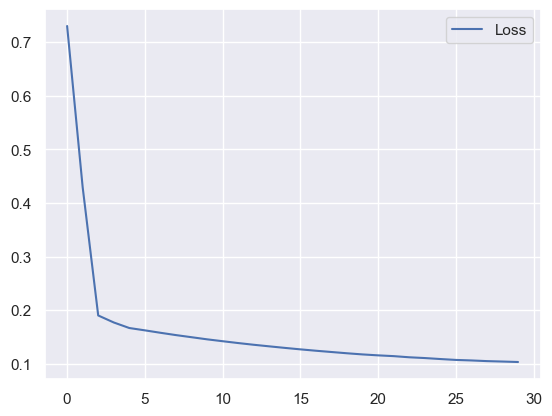

In [158]:
# plot history
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

# Make prediction

In [159]:
# make a prediction
y_test_pre=model.predict(x_test)
# check length
y_test_pre.shape,y_test.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


((301, 1), (301,))

# Model Evaluation

In [160]:
pa=pd.DataFrame()
pa['year']=X_test.reset_index().year.iloc[1:-1]
pa['Prediction']=[i[0] for i in y_test_pre][1:] 
pa['Actual Values']=y_test[:-1]
pa.head()

,year,Prediction,Actual Values
1,2019,0.910181,0.817027
2,2020,0.875932,0.851027
3,2021,0.663549,0.894754
4,2016,0.963560,1.026075
5,2017,0.907014,1.122946


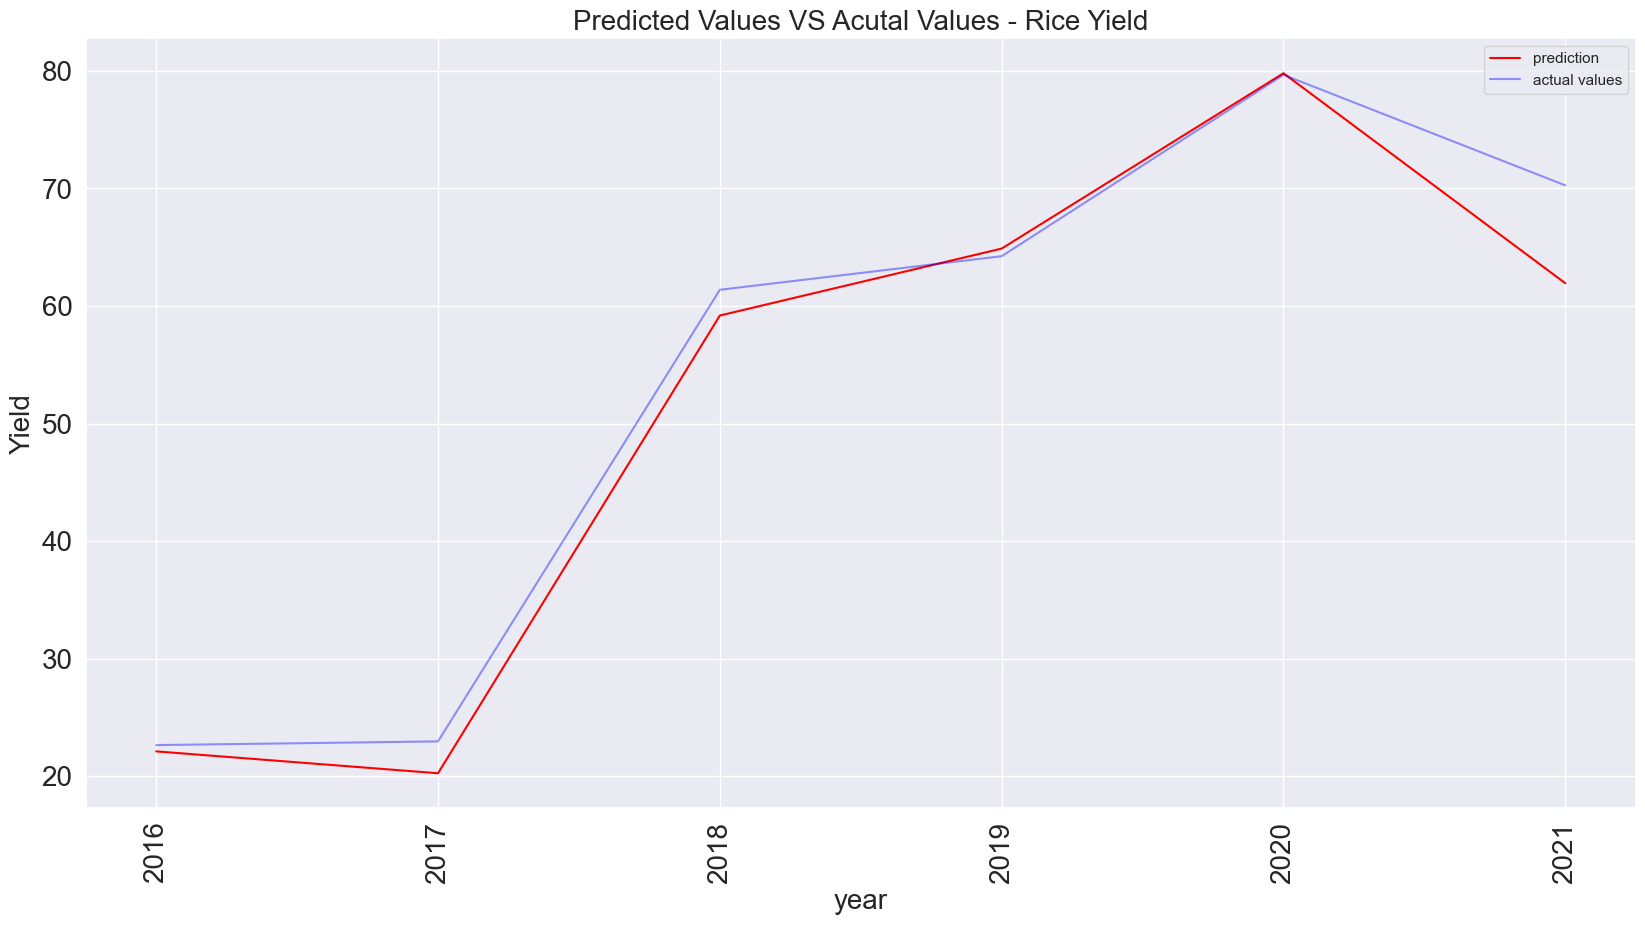

In [163]:
plt.figure(figsize=(20,10))
pa.groupby('year')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
pa.groupby("year")['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('Yield',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Rice Yield',fontsize=20)
plt.legend()

In [168]:
def RMSE(actual,prediction):
    rmse = np.sqrt(mean_squared_error(actual,prediction))
    return rmse

In [169]:
print(RMSE(y_test[:-1],[i[0] for i in y_test_pre][1:]))

0.14655285175965324


In [170]:
from sklearn.metrics import mean_squared_error
import numpy as np

def RMSE(actual, prediction):
    rmse = np.sqrt(mean_squared_error(actual, prediction))
    return rmse

# Example usage with your dataset:
rmse_value = RMSE(pa['Actual Values'], pa['Prediction'])
print(f"RMSE: {rmse_value}")


RMSE: 0.14655285175965324


# 6.4. LSTM for top 10 contries


# trial